In [197]:
import GetOldTweets3 as got
import requests
import json 
import pandas as pd
from time import sleep
import time
import tweepy

In [7]:
hou_traffic_accounts = ['houstontranstar', 'us290nw_traffic', 'TxDOTHouston', 'TotalTrafficHOU', 'METROHouAlerts']
hou_public_safety_accounts = ['HoustonOEM', 'ReadyHarris', 'HCSOTexas', 'houstonpolice', 'HoustonFire']
hou_weather_accounts = ['NWSHouston', 'KHOUweather', 'abc13weather', 'KPRC2WEATHER']

In [13]:
keywords = ['close']

In [ ]:
# perform two pulls train and test
# one with key words and one without

In [23]:
t0 = time.time()

keywords = ['closed']
username = []
text = []
date = []
for keyword in keywords:
    for account in hou_traffic_accounts:
        tweetCriteria = got.manager.TweetCriteria().setUsername(account).setSince("2019-01-01").setUntil("2019-12-31").setQuerySearch(keyword)
        tweet_collection = got.manager.TweetManager.getTweets(tweetCriteria) 
        
        print(f"Total tweets scraped: {len(tweet_collection)}")
        for tweet in tweet_collection:
            username.append(tweet.username)
            text.append(tweet.text)
            date.append(tweet.date)
        
print(f'Seconds to execute:',(time.time() - t0))

Total tweets scraped: 41
Total tweets scraped: 0
Total tweets scraped: 189
Total tweets scraped: 991
Total tweets scraped: 52
Seconds to execute: 56.338459730148315


In [24]:
train_tweets_2019 = pd.DataFrame({'username': username,
                                'tweet': text,
                                'date_posted': date})

In [72]:
train_tweets

,username,tweet,date_posted
0,houstontranstar,CONSTRUCTION ALERT The I-610 West Loop NB and ...,2019-11-08 21:26:25+00:00
1,houstontranstar,ROAD CLOSURE REMINDER: Closed until Feb. 2020 ...,2019-11-04 14:57:09+00:00
2,houstontranstar,Heads up! IH-610 South Loop (EB) frontage road...,2019-10-18 13:56:50+00:00
3,houstontranstar,WEEKEND ROAD CLOSURE: @TxDOTHouston crews will...,2019-08-15 13:46:18+00:00
4,houstontranstar,Grand Parkway North westbound @Shaw Rd. (Accid...,2019-08-12 19:40:37+00:00
...,...,...,...
1268,METROHouAlerts,"Due to debris removal, the Milam St entrance o...",2019-02-26 19:23:40+00:00
1269,METROHouAlerts,"It was briefly closed, but is open now. ^B",2019-02-07 12:32:08+00:00
1270,METROHouAlerts,Expect significant delays into downtown due to...,2019-02-07 12:13:42+00:00
1271,METROHouAlerts,UPDATE: The Northwest Fwy HOV lane remains clo...,2019-01-03 00:42:22+00:00


In [69]:
t0 = time.time()

keywords = ['closed']
username = []
text = []
date = []
for keyword in keywords:
    for account in hou_public_safety_accounts:
        tweetCriteria = got.manager.TweetCriteria().setUsername(account).setSince("2019-01-01").setUntil("2019-12-31").setQuerySearch(keyword)
        tweet_collection = got.manager.TweetManager.getTweets(tweetCriteria) 
        
        print(f"Total tweets scraped: {len(tweet_collection)}")
        for tweet in tweet_collection:
            username.append(tweet.username)
            text.append(tweet.text)
            date.append(tweet.date)
        
print(f'Seconds to execute:',(time.time() - t0))

Total tweets scraped: 9
Total tweets scraped: 9
Total tweets scraped: 10
Total tweets scraped: 72
Total tweets scraped: 1
Seconds to execute: 12.520065069198608


In [198]:
train_safety_tweets_2019 = train_tweets_2019 = pd.DataFrame({'username': username,
                                'tweet': text,
                                'date_posted': date})

train_safety_tweets_2019

,username,tweet,date_posted
0,houstontranstar,Heading home? Check out the @HoustonTranStar t...,2019-12-30 22:47:00+00:00
1,houstontranstar,http://traffic.houstontranstar.org/layers/,2019-12-30 22:44:31+00:00
2,houstontranstar,http://traffic.houstontranstar.org/layers/,2019-12-30 22:32:44+00:00
3,houstontranstar,An important reminder to share with loved ones...,2019-12-30 19:46:56+00:00
4,houstontranstar,The #NewYear is almost here! It’s a great time...,2019-12-30 19:24:44+00:00
...,...,...,...
5529,TxDOTHouston,Thanks to all the awesome law enforcement agen...,2019-01-01 23:46:54+00:00
5530,TxDOTHouston,Please follow this advice. No need to be on th...,2019-01-01 12:06:12+00:00
5531,TxDOTHouston,Major crash involving 10-20 vehicles has all m...,2019-01-01 08:56:29+00:00
5532,TxDOTHouston,Many areas experiencing heavy fog. Mix this wi...,2019-01-01 07:31:31+00:00


In [74]:
train_tweets_2019 = pd.concat([train_tweets, train_safety_tweets_2019])

train_tweets_2019

,username,tweet,date_posted
0,houstontranstar,CONSTRUCTION ALERT The I-610 West Loop NB and ...,2019-11-08 21:26:25+00:00
1,houstontranstar,ROAD CLOSURE REMINDER: Closed until Feb. 2020 ...,2019-11-04 14:57:09+00:00
2,houstontranstar,Heads up! IH-610 South Loop (EB) frontage road...,2019-10-18 13:56:50+00:00
3,houstontranstar,WEEKEND ROAD CLOSURE: @TxDOTHouston crews will...,2019-08-15 13:46:18+00:00
4,houstontranstar,Grand Parkway North westbound @Shaw Rd. (Accid...,2019-08-12 19:40:37+00:00
...,...,...,...
96,houstonpolice,"610 West Loop (northbound) @Evergreen, acciden...",2019-01-18 12:20:46+00:00
97,houstonpolice,"I-45 North (outbound) @Airline, a five vehicle...",2019-01-15 05:52:04+00:00
98,houstonpolice,Adult female deceased at the scene. Initial re...,2019-01-08 07:50:40+00:00
99,houstonpolice,"IH-45 (southbound) @Scott, all lanes closed du...",2019-01-08 07:41:58+00:00


# 2018 training data

In [95]:
t0 = time.time()

keywords = ['closed']
username_traffic_2018 = []
text_traffic_2018 = []
date_traffic_2018 = []
for keyword in keywords:
    for account in hou_traffic_accounts:
        tweetCriteria = got.manager.TweetCriteria().setUsername(account).setSince("2018-01-01").setUntil("2018-12-31").setQuerySearch(keyword)
        tweet_collection = got.manager.TweetManager.getTweets(tweetCriteria) 
        
        print(f"Total tweets scraped: {len(tweet_collection)}")
        for tweet in tweet_collection:
            username_traffic_2018.append(tweet.username)
            text_traffic_2018.append(tweet.text)
            date_traffic_2018.append(tweet.date)
        
print(f'Seconds to execute:',(time.time() - t0))

Total tweets scraped: 5
Total tweets scraped: 0
Total tweets scraped: 101
Total tweets scraped: 1480
Total tweets scraped: 92
Seconds to execute: 61.177107095718384


In [97]:
train_traffic_tweets_2018 = pd.DataFrame({'username': username_traffic_2018,
                                'tweet': text_traffic_2018,
                                'date_posted': date_traffic_2018})

train_traffic_tweets_2018

,username,tweet,date_posted
0,houstontranstar,Main lanes still closed on US-290 Eastbound at...,2018-12-30 00:25:52+00:00
1,houstontranstar,REMINDER: All four northbound lanes of Shepher...,2018-12-21 22:23:25+00:00
2,houstontranstar,HEADS UP #Houston Drivers: Effective immediate...,2018-12-21 20:10:25+00:00
3,houstontranstar,"Hi, Angie! Looks like it may be closed until 5...",2018-10-18 13:58:41+00:00
4,houstontranstar,This Incident will be worked as a hazmat situa...,2018-01-16 00:01:23+00:00
...,...,...,...
1673,METROHouAlerts,"SERVICE WILL BE SUSPENDED on the 44, 85, 86 & ...",2018-01-16 19:00:13+00:00
1674,METROHouAlerts,FYI: The METRO RideStores at 1900 Main and 100...,2018-01-16 18:18:52+00:00
1675,METROHouAlerts,Ice is being reported on some roads. We just c...,2018-01-16 13:39:28+00:00
1676,METROHouAlerts,"Due to current road conditions, ALL HOT/HOV la...",2018-01-16 13:37:40+00:00


In [98]:
t0 = time.time()

keywords = ['closed']
username_safety_2018 = []
text_safety_2018 = []
date_safety_2018 = []
for keyword in keywords:
    for account in hou_public_safety_accounts:
        tweetCriteria = got.manager.TweetCriteria().setUsername(account).setSince("2018-01-01").setUntil("2018-12-31").setQuerySearch(keyword)
        tweet_collection = got.manager.TweetManager.getTweets(tweetCriteria) 
        
        print(f"Total tweets scraped: {len(tweet_collection)}")
        for tweet in tweet_collection:
            username_safety_2018.append(tweet.username)
            text_safety_2018.append(tweet.text)
            date_safety_2018.append(tweet.date)
        
print(f'Seconds to execute:',(time.time() - t0))

Total tweets scraped: 14
Total tweets scraped: 6
Total tweets scraped: 95
Total tweets scraped: 53
Total tweets scraped: 1
Seconds to execute: 9.026185989379883


In [99]:
train_safety_tweets_2018 = pd.DataFrame({'username': username_safety_2018,
                                'tweet': text_safety_2018,
                                'date_posted': date_safety_2018})

train_safety_tweets_2018

,username,tweet,date_posted
0,HoustonOEM,UPDATE: 45 North Freeway exit ramp at Houston ...,2018-12-08 07:29:26+00:00
1,HoustonOEM,UPDATE: Travis at Commerce and Milam at Commer...,2018-12-08 06:07:55+00:00
2,HoustonOEM,Check with @houstontranstar for updates on IH-...,2018-10-16 20:21:51+00:00
3,HoustonOEM,Another holiday in Houston and you know what t...,2018-09-02 16:15:10+00:00
4,HoustonOEM,.@FEMA Disaster Recovery Centers are closed ag...,2018-01-17 15:23:39+00:00
...,...,...,...
164,houstonpolice,IH-59 Eastex Fwy S/B @3700 block closed all la...,2018-01-17 11:20:35+00:00
165,houstonpolice,This stretch of the SW Fwy inbound has been cl...,2018-01-17 10:37:12+00:00
166,houstonpolice,"Units have I-10 W/B, I-10 E/B, & Hwy 90 W/B ra...",2018-01-16 05:49:22+00:00
167,houstonpolice,"I-45 North (southbound) @North Street, acciden...",2018-01-12 17:07:22+00:00


In [100]:
train_tweets_2018 = pd.concat([train_traffic_tweets_2018, train_safety_tweets_2018])

# 2017 Training Data

In [101]:
t0 = time.time()

keywords = ['closed']
username_traffic_2017 = []
text_traffic_2017 = []
date_traffic_2017 = []
for keyword in keywords:
    for account in hou_traffic_accounts:
        tweetCriteria = got.manager.TweetCriteria().setUsername(account).setSince("2017-01-01").setUntil("2017-12-31").setQuerySearch(keyword)
        tweet_collection = got.manager.TweetManager.getTweets(tweetCriteria) 
        
        print(f"Total tweets scraped: {len(tweet_collection)}")
        for tweet in tweet_collection:
            username_traffic_2017.append(tweet.username)
            text_traffic_2017.append(tweet.text)
            date_traffic_2017.append(tweet.date)
        
print(f'Seconds to execute:',(time.time() - t0))

Total tweets scraped: 0
Total tweets scraped: 0
Total tweets scraped: 80
Total tweets scraped: 1973
Total tweets scraped: 77
Seconds to execute: 87.72192883491516


In [102]:
train_traffic_tweets_2017 = pd.DataFrame({'username': username_traffic_2017,
                                'tweet': text_traffic_2017,
                                'date_posted': date_traffic_2017})

train_traffic_tweets_2017

,username,tweet,date_posted
0,TxDOTHouston,If you are heading to @SugarLandtxgov and beyo...,2017-12-13 23:22:50+00:00
1,TxDOTHouston,"Due to bridge repairs, TxDOT has closed two al...",2017-12-13 01:35:30+00:00
2,TxDOTHouston,Good news. All mainlanes of I-45 N Frwy NB bet...,2017-12-04 02:46:13+00:00
3,TxDOTHouston,I-45 Northbound direct connector project conti...,2017-12-01 14:49:35+00:00
4,TxDOTHouston,Two incident on I-10 Katy Frwy are significant...,2017-11-28 22:18:29+00:00
...,...,...,...
2125,METROHouAlerts,"The 217 is operating, but HOV lanes are closed...",2017-01-18 13:35:51+00:00
2126,METROHouAlerts,Also - the HOV lanes are closed so the 102 is ...,2017-01-18 13:33:52+00:00
2127,METROHouAlerts,All HOV Lanes remain closed at this time. ^A,2017-01-18 12:19:12+00:00
2128,METROHouAlerts,Yes the 290 is closed. ^A,2017-01-18 12:04:58+00:00


In [103]:
t0 = time.time()

keywords = ['closed']
username_safety_2017 = []
text_safety_2017 = []
date_safety_2017 = []
for keyword in keywords:
    for account in hou_public_safety_accounts:
        tweetCriteria = got.manager.TweetCriteria().setUsername(account).setSince("2017-01-01").setUntil("2017-12-31").setQuerySearch(keyword)
        tweet_collection = got.manager.TweetManager.getTweets(tweetCriteria) 
        
        print(f"Total tweets scraped: {len(tweet_collection)}")
        for tweet in tweet_collection:
            username_safety_2017.append(tweet.username)
            text_safety_2017.append(tweet.text)
            date_safety_2017.append(tweet.date)
        
print(f'Seconds to execute:',(time.time() - t0))

Total tweets scraped: 18
Total tweets scraped: 21
Total tweets scraped: 12
Total tweets scraped: 65
Total tweets scraped: 2
Seconds to execute: 7.481235027313232


In [104]:
train_safety_tweets_2017 = pd.DataFrame({'username': username_safety_2017,
                                'tweet': text_safety_2017,
                                'date_posted': date_safety_2017})

train_safety_tweets_2017

,username,tweet,date_posted
0,HoustonOEM,Access road on SB I-45 after Parker is closed....,2017-12-15 20:14:49+00:00
1,HoustonOEM,Eastbound Pinemont after TC Jester is closed d...,2017-11-28 22:31:01+00:00
2,HoustonOEM,TRAFFIC ADVISORY | I-10 Westbound at IH-610 We...,2017-11-28 20:03:55+00:00
3,HoustonOEM,.@FEMA Disaster Recovery Centers will be close...,2017-11-17 16:45:34+00:00
4,HoustonOEM,Memorial Drive Inbound is closed @Houston Ave....,2017-11-03 18:23:23+00:00
...,...,...,...
113,houstonpolice,IH-45 GULF Northbound At SCOTT ST - CLOSED FOR...,2017-02-21 21:03:49+00:00
114,houstonpolice,HPD investigating fatal roll-over accident at ...,2017-02-01 07:57:06+00:00
115,houstonpolice,Inbound lanes of 45 North Fwy closed at I-10 d...,2017-01-17 16:48:59+00:00
116,HoustonFire,Ellington Field is under evacuation after an F...,2017-06-21 17:34:17+00:00


In [105]:
train_tweets_2017 = pd.concat([train_traffic_tweets_2017, train_safety_tweets_2017])

# all training data

In [106]:
train_tweets = pd.concat([train_tweets_2017, train_tweets_2018, train_tweets_2019])

train_tweets

,username,tweet,date_posted
0,TxDOTHouston,If you are heading to @SugarLandtxgov and beyo...,2017-12-13 23:22:50+00:00
1,TxDOTHouston,"Due to bridge repairs, TxDOT has closed two al...",2017-12-13 01:35:30+00:00
2,TxDOTHouston,Good news. All mainlanes of I-45 N Frwy NB bet...,2017-12-04 02:46:13+00:00
3,TxDOTHouston,I-45 Northbound direct connector project conti...,2017-12-01 14:49:35+00:00
4,TxDOTHouston,Two incident on I-10 Katy Frwy are significant...,2017-11-28 22:18:29+00:00
...,...,...,...
96,houstonpolice,"610 West Loop (northbound) @Evergreen, acciden...",2019-01-18 12:20:46+00:00
97,houstonpolice,"I-45 North (outbound) @Airline, a five vehicle...",2019-01-15 05:52:04+00:00
98,houstonpolice,Adult female deceased at the scene. Initial re...,2019-01-08 07:50:40+00:00
99,houstonpolice,"IH-45 (southbound) @Scott, all lanes closed du...",2019-01-08 07:41:58+00:00


# obtaining 'test' data without a keyword search for 'closed'

In [137]:
t0 = time.time()

keywords = ['']
username_traffic_2019 = []
text_traffic_2019 = []
date_traffic_2019 = []
for keyword in keywords:
    for account in hou_traffic_accounts:
        tweetCriteria = got.manager.TweetCriteria().setUsername(account).setSince("2019-01-01").setUntil("2019-12-31").setQuerySearch(keyword).setMaxTweets(1000)
        tweet_collection = got.manager.TweetManager.getTweets(tweetCriteria) 
        
        print(f"Total tweets scraped: {len(tweet_collection)}")
        for tweet in tweet_collection:
            username_traffic_2019.append(tweet.username)
            text_traffic_2019.append(tweet.text)
            date_traffic_2019.append(tweet.date)
        
print(f'Seconds to execute:',(time.time() - t0))

Total tweets scraped: 762
Total tweets scraped: 1000
Total tweets scraped: 1000
Total tweets scraped: 1000
An error occured during an HTTP request: HTTP Error 429: Too Many Requests
Try to open in browser: https://twitter.com/search?q=%20from%3Ametrohoualerts%20since%3A2019-01-01%20until%3A2019-12-31&src=typd


SystemExit: 

In [138]:
test_traffic_2019 = pd.DataFrame({'username': username_traffic_2019,
                                'tweet': text_traffic_2019,
                                'date_posted': date_traffic_2019})

test_traffic_2019.head()

,username,tweet,date_posted
0,houstontranstar,Heading home? Check out the @HoustonTranStar t...,2019-12-30 22:47:00+00:00
1,houstontranstar,http://traffic.houstontranstar.org/layers/,2019-12-30 22:44:31+00:00
2,houstontranstar,http://traffic.houstontranstar.org/layers/,2019-12-30 22:32:44+00:00
3,houstontranstar,An important reminder to share with loved ones...,2019-12-30 19:46:56+00:00
4,houstontranstar,The #NewYear is almost here! It’s a great time...,2019-12-30 19:24:44+00:00


In [112]:
t0 = time.time()

keywords = ['']
username_safety_2019 = []
text_safety_2019 = []
date_safety_2019 = []
for keyword in keywords:
    for account in hou_public_safety_accounts:
        tweetCriteria = got.manager.TweetCriteria().setUsername(account).setSince("2019-01-01").setUntil("2019-12-31").setQuerySearch(keyword)
        tweet_collection = got.manager.TweetManager.getTweets(tweetCriteria) 
        
        print(f"Total tweets scraped: {len(tweet_collection)}")
        for tweet in tweet_collection:
            username_safety_2019.append(tweet.username)
            text_safety_2019.append(tweet.text)
            date_safety_2019.append(tweet.date)
        
print(f'Seconds to execute:',(time.time() - t0))

Total tweets scraped: 489
Total tweets scraped: 1299
Total tweets scraped: 1083
Total tweets scraped: 2503
Total tweets scraped: 425
Seconds to execute: 228.40476298332214


In [113]:
test_safety_2019 = pd.DataFrame({'username': username_safety_2019,
                                'tweet': text_safety_2019,
                                'date_posted': date_safety_2019})

test_safety_2019.head()

,username,tweet,date_posted
0,HoustonOEM,┏━━┓┏━━┓┏━━┓┏━━┓ ┗━┓┃┃┏┓┃┗━┓┃┃┏┓┃ ┏━┛┃┃┃┃┃┏━┛┃...,2019-12-30 16:09:07+00:00
1,HoustonOEM,Thread: @houstonpolice is asking the public to...,2019-12-23 14:44:13+00:00
2,HoustonOEM,#HappyHolidays from the entire Houston OEM tea...,2019-12-23 14:01:12+00:00
3,HoustonOEM,Thread: most recent mercury spill update from ...,2019-12-19 22:25:19+00:00
4,HoustonOEM,MERCURY SPILL UPDATE: Law enforcement continue...,2019-12-18 22:58:13+00:00


In [114]:
t0 = time.time()

keywords = ['']
username_weather_2019 = []
text_weather_2019 = []
date_weather_2019 = []
for keyword in keywords:
    for account in hou_weather_accounts:
        tweetCriteria = got.manager.TweetCriteria().setUsername(account).setSince("2019-01-01").setUntil("2019-12-31").setQuerySearch(keyword)
        tweet_collection = got.manager.TweetManager.getTweets(tweetCriteria) 
        
        print(f"Total tweets scraped: {len(tweet_collection)}")
        for tweet in tweet_collection:
            username_weather_2019.append(tweet.username)
            text_weather_2019.append(tweet.text)
            date_weather_2019.append(tweet.date)
        
print(f'Seconds to execute:',(time.time() - t0))

Total tweets scraped: 4914
Total tweets scraped: 92
Total tweets scraped: 1415
Total tweets scraped: 773
Seconds to execute: 273.251916885376


In [115]:
test_weather_2019 = pd.DataFrame({'username': username_weather_2019,
                                'tweet': text_weather_2019,
                                'date_posted': date_weather_2019})

test_weather_2019.head()

,username,tweet,date_posted
0,NWSHouston,How open are you to changing your definition o...,2019-12-30 23:53:33+00:00
1,NWSHouston,"We're going crazy with the forecast, and doing...",2019-12-30 23:44:36+00:00
2,NWSHouston,The first day of the new decade will be an ove...,2019-12-30 21:38:14+00:00
3,NWSHouston,Start out 2020 with these New Year's Day Clima...,2019-12-30 18:27:05+00:00
4,NWSHouston,Count down the end of the year with these New ...,2019-12-30 18:24:07+00:00


In [140]:
test_tweets_2019 = pd.concat([test_safety_2019, test_traffic_2019, test_weather_2019])
test_tweets_2019

,username,tweet,date_posted
0,HoustonOEM,┏━━┓┏━━┓┏━━┓┏━━┓ ┗━┓┃┃┏┓┃┗━┓┃┃┏┓┃ ┏━┛┃┃┃┃┃┏━┛┃...,2019-12-30 16:09:07+00:00
1,HoustonOEM,Thread: @houstonpolice is asking the public to...,2019-12-23 14:44:13+00:00
2,HoustonOEM,#HappyHolidays from the entire Houston OEM tea...,2019-12-23 14:01:12+00:00
3,HoustonOEM,Thread: most recent mercury spill update from ...,2019-12-19 22:25:19+00:00
4,HoustonOEM,MERCURY SPILL UPDATE: Law enforcement continue...,2019-12-18 22:58:13+00:00
...,...,...,...
7189,KPRC2WEATHER,Weather Alert: Flood Warning for Liberty and P...,2019-01-03 08:13:56+00:00
7190,KPRC2WEATHER,Weather Alert: Flood Warning for Walker County...,2019-01-03 08:13:56+00:00
7191,KPRC2WEATHER,Weather Alert: Flood Warning for Burleson Coun...,2019-01-03 01:52:46+00:00
7192,KPRC2WEATHER,Weather Alert: Flood Warning for Burleson and ...,2019-01-03 01:52:46+00:00


## 2018 test tweets

In [129]:
t0 = time.time()

keywords = ['']
username_traffic_2018 = []
text_traffic_2018 = []
date_traffic_2018 = []
for keyword in keywords:
    for account in hou_traffic_accounts:
        tweetCriteria = got.manager.TweetCriteria().setUsername(account).setSince("2018-01-01").setUntil("2018-12-31").setQuerySearch(keyword).setMaxTweets(5_000)
        tweet_collection = got.manager.TweetManager.getTweets(tweetCriteria) 
        
        print(f"Total tweets scraped: {len(tweet_collection)}")
        for tweet in tweet_collection:
            username_traffic_2018.append(tweet.username)
            text_traffic_2018.append(tweet.text)
            date_traffic_2018.append(tweet.date)
        
print(f'Seconds to execute:',(time.time() - t0))

Total tweets scraped: 5000
Total tweets scraped: 1679
Total tweets scraped: 1286
Total tweets scraped: 5000
An error occured during an HTTP request: HTTP Error 429: Too Many Requests
Try to open in browser: https://twitter.com/search?q=%20from%3Ametrohoualerts%20since%3A2018-01-01%20until%3A2018-12-31&src=typd


SystemExit: 

In [130]:
test_traffic_2018 = pd.DataFrame({'username': username_traffic_2018,
                                'tweet': text_traffic_2018,
                                'date_posted': date_traffic_2018})

test_traffic_2018.head()

,username,tweet,date_posted
0,houstontranstar,https://traffic.houstontranstar.org/layers/,2018-12-30 00:28:45+00:00
1,houstontranstar,Main lanes still closed on US-290 Eastbound at...,2018-12-30 00:25:52+00:00
2,houstontranstar,https://traffic.houstontranstar.org/layers/,2018-12-30 00:22:47+00:00
3,houstontranstar,A great reminder from @HCSOTexas! Do not drink...,2018-12-28 21:34:40+00:00
4,houstontranstar,Check out the #HoustonTranStar website for an ...,2018-12-28 20:52:49+00:00


In [131]:
test_traffic_2018.shape

(12965, 3)

In [120]:
t0 = time.time()

keywords = ['']
username_safety_2018 = []
text_safety_2018 = []
date_safety_2018 = []
for keyword in keywords:
    for account in hou_public_safety_accounts:
        tweetCriteria = got.manager.TweetCriteria().setUsername(account).setSince("2018-01-01").setUntil("2018-12-31").setQuerySearch(keyword)
        tweet_collection = got.manager.TweetManager.getTweets(tweetCriteria) 
        
        print(f"Total tweets scraped: {len(tweet_collection)}")
        for tweet in tweet_collection:
            username_safety_2018.append(tweet.username)
            text_safety_2018.append(tweet.text)
            date_safety_2018.append(tweet.date)
        
print(f'Seconds to execute:',(time.time() - t0))

Total tweets scraped: 491
Total tweets scraped: 1161
Total tweets scraped: 1833
Total tweets scraped: 2736
Total tweets scraped: 769
Seconds to execute: 270.61671710014343


In [121]:
test_safety_2018 = pd.DataFrame({'username': username_safety_2018,
                                'tweet': text_safety_2018,
                                'date_posted': date_safety_2018})

test_safety_2018.head()

,username,tweet,date_posted
0,HoustonOEM,Residents in these areas should remain alert t...,2018-12-27 18:33:25+00:00
1,HoustonOEM,UPDATE: @NWSHouston has cancelled this morning...,2018-12-27 13:25:05+00:00
2,HoustonOEM,.@NWSHouston has issued a Tornado Watch until ...,2018-12-27 12:30:07+00:00
3,HoustonOEM,Sign up for @AlertHouston at http://www.alerth...,2018-12-27 10:03:18+00:00
4,HoustonOEM,"Hi Paul, follow @CNPalerts for any updates dur...",2018-12-27 04:15:01+00:00


In [118]:
t0 = time.time()

keywords = ['']
username_weather_2018 = []
text_weather_2018 = []
date_weather_2018 = []
for keyword in keywords:
    for account in hou_weather_accounts:
        tweetCriteria = got.manager.TweetCriteria().setUsername(account).setSince("2018-01-01").setUntil("2018-12-31").setQuerySearch(keyword)
        tweet_collection = got.manager.TweetManager.getTweets(tweetCriteria) 
        
        print(f"Total tweets scraped: {len(tweet_collection)}")
        for tweet in tweet_collection:
            username_weather_2018.append(tweet.username)
            text_weather_2018.append(tweet.text)
            date_weather_2018.append(tweet.date)
        
print(f'Seconds to execute:',(time.time() - t0))

Total tweets scraped: 2884
Total tweets scraped: 876
Total tweets scraped: 337
Total tweets scraped: 430
Seconds to execute: 191.06329894065857


In [119]:
test_weather_2018 = pd.DataFrame({'username': username_weather_2018,
                                'tweet': text_weather_2018,
                                'date_posted': date_weather_2018})

test_weather_2018.head()

,username,tweet,date_posted
0,NWSHouston,Flood Warning Extended until Monday Morningthe...,2018-12-30 16:16:44+00:00
1,NWSHouston,The Flood Warning Continues for The Navasota R...,2018-12-30 16:16:01+00:00
2,NWSHouston,The Flood Warning Continues for The West Fork ...,2018-12-30 16:15:19+00:00
3,NWSHouston,The Flood Warning Continues for The East Fork ...,2018-12-30 16:14:36+00:00
4,NWSHouston,The Flood Warning Continues for The Trinity Ri...,2018-12-30 16:13:53+00:00


In [141]:
test_tweets_2018 = pd.concat([test_safety_2018, test_traffic_2018, test_weather_2018])
test_tweets_2018

,username,tweet,date_posted
0,HoustonOEM,Residents in these areas should remain alert t...,2018-12-27 18:33:25+00:00
1,HoustonOEM,UPDATE: @NWSHouston has cancelled this morning...,2018-12-27 13:25:05+00:00
2,HoustonOEM,.@NWSHouston has issued a Tornado Watch until ...,2018-12-27 12:30:07+00:00
3,HoustonOEM,Sign up for @AlertHouston at http://www.alerth...,2018-12-27 10:03:18+00:00
4,HoustonOEM,"Hi Paul, follow @CNPalerts for any updates dur...",2018-12-27 04:15:01+00:00
...,...,...,...
4522,KPRC2WEATHER,ICYMI- Last really icy morning today- we'll be...,2018-01-04 13:11:34+00:00
4523,KPRC2WEATHER,Morning everyone!! Still cold this morning in ...,2018-01-04 11:14:40+00:00
4524,KPRC2WEATHER,BRRR! Wind chill temperatures will make it fee...,2018-01-01 22:56:14+00:00
4525,KPRC2WEATHER,How about a little sleet and some flurries in ...,2018-01-01 02:48:46+00:00


## 2017 test tweets

In [135]:
t0 = time.time()

keywords = ['']
username_traffic_2017 = []
text_traffic_2017 = []
date_traffic_2017 = []
for keyword in keywords:
    for account in hou_traffic_accounts:
        tweetCriteria = got.manager.TweetCriteria().setUsername(account).setSince("2017-01-01").setUntil("2017-12-31").setQuerySearch(keyword).setMaxTweets(2_500)
        tweet_collection = got.manager.TweetManager.getTweets(tweetCriteria) 
        
        print(f"Total tweets scraped: {len(tweet_collection)}")
        for tweet in tweet_collection:
            username_traffic_2017.append(tweet.username)
            text_traffic_2017.append(tweet.text)
            date_traffic_2017.append(tweet.date)
        
print(f'Seconds to execute:',(time.time() - t0))

Total tweets scraped: 2500
Total tweets scraped: 834
Total tweets scraped: 1726
Total tweets scraped: 2500
Total tweets scraped: 2500
Seconds to execute: 386.2205288410187


In [136]:
test_traffic_2017 = pd.DataFrame({'username': username_traffic_2017,
                                'tweet': text_traffic_2017,
                                'date_posted': date_traffic_2017})

test_traffic_2017

,username,tweet,date_posted
0,houstontranstar,IH-45 GULF Northbound At GRIGGS RD - Stall - S...,2017-12-30 23:57:05+00:00
1,houstontranstar,SH-225 Westbound At GOODYEAR - Accident - Stat...,2017-12-30 23:51:05+00:00
2,houstontranstar,IH-10 KATY Westbound Before SH-6 - Accident - ...,2017-12-30 23:39:05+00:00
3,houstontranstar,IH-610 NORTH LOOP Westbound At HARDY TOLL RD/S...,2017-12-30 23:27:05+00:00
4,houstontranstar,IH-10 KATY Eastbound At SILBER RD - Road Debri...,2017-12-30 23:09:05+00:00
...,...,...,...
10055,METROHouAlerts,The #METROBus160 route has resumed regular ser...,2017-09-11 15:15:34+00:00
10056,METROHouAlerts,The #METROBus153 westbound route has resumed r...,2017-09-11 14:20:00+00:00
10057,METROHouAlerts,#METROBus77 will continue along Homestead and ...,2017-09-11 14:19:02+00:00
10058,METROHouAlerts,One bus on #METROBus88 S/B delayed at Airport/...,2017-09-11 14:09:46+00:00


In [142]:
t0 = time.time()

keywords = ['']
username_safety_2017 = []
text_safety_2017 = []
date_safety_2017 = []
for keyword in keywords:
    for account in hou_public_safety_accounts:
        tweetCriteria = got.manager.TweetCriteria().setUsername(account).setSince("2017-01-01").setUntil("2017-12-31").setQuerySearch(keyword).setMaxTweets(2_500)
        tweet_collection = got.manager.TweetManager.getTweets(tweetCriteria) 
        
        print(f"Total tweets scraped: {len(tweet_collection)}")
        for tweet in tweet_collection:
            username_safety_2017.append(tweet.username)
            text_safety_2017.append(tweet.text)
            date_safety_2017.append(tweet.date)
        
print(f'Seconds to execute:',(time.time() - t0))

Total tweets scraped: 1316
Total tweets scraped: 1866
Total tweets scraped: 1510
Total tweets scraped: 2456
Total tweets scraped: 572
Seconds to execute: 298.6385910511017


In [143]:
test_safety_2017 = pd.DataFrame({'username': username_safety_2017,
                                'tweet': text_safety_2017,
                                'date_posted': date_safety_2017})

test_safety_2017

,username,tweet,date_posted
0,HoustonOEM,"Durante Clima Invernal , Recuerda proteger las...",2017-12-30 18:01:00+00:00
1,HoustonOEM,"During cold weather , remember to protect the ...",2017-12-30 18:00:03+00:00
2,HoustonOEM,"Also, while you can buy fireworks in the uninc...",2017-12-29 20:43:42+00:00
3,HoustonOEM,As we expect temperatures to continue their de...,2017-12-29 19:11:17+00:00
4,HoustonOEM,Dense Fog Advisory in effect until 10:00am. Sl...,2017-12-19 12:15:30+00:00
...,...,...,...
7715,HoustonFire,@SylvesterTurner News Conference- thirty day c...,2017-01-05 16:07:39+00:00
7716,HoustonFire,Congratulations to the Houston Fire Department...,2017-01-04 16:52:18+00:00
7717,HoustonFire,18 members being promoted this morning,2017-01-04 16:04:36+00:00
7718,HoustonFire,"In 2016, HFD responded to 335,973 incidents (4...",2017-01-03 17:18:08+00:00


In [144]:
t0 = time.time()

keywords = ['']
username_weather_2017 = []
text_weather_2017 = []
date_weather_2017 = []
for keyword in keywords:
    for account in hou_weather_accounts:
        tweetCriteria = got.manager.TweetCriteria().setUsername(account).setSince("2017-01-01").setUntil("2017-12-31").setQuerySearch(keyword).setMaxTweets(2_500)
        tweet_collection = got.manager.TweetManager.getTweets(tweetCriteria) 
        
        print(f"Total tweets scraped: {len(tweet_collection)}")
        for tweet in tweet_collection:
            username_weather_2017.append(tweet.username)
            text_weather_2017.append(tweet.text)
            date_weather_2017.append(tweet.date)
        
print(f'Seconds to execute:',(time.time() - t0))

Total tweets scraped: 2500
Total tweets scraped: 2152
An error occured during an HTTP request: HTTP Error 429: Too Many Requests
Try to open in browser: https://twitter.com/search?q=%20from%3Aabc13weather%20since%3A2017-01-01%20until%3A2017-12-31&src=typd


SystemExit: 

In [145]:
test_weather_2017 = pd.DataFrame({'username': username_weather_2017,
                                'tweet': text_weather_2017,
                                'date_posted': date_weather_2017})

test_weather_2017

,username,tweet,date_posted
0,NWSHouston,This here's some good advice. And if you're pl...,2017-12-30 14:36:22+00:00
1,NWSHouston,Today will be the day to start wrapping pipes ...,2017-12-30 12:36:13+00:00
2,NWSHouston,"As we head into the New Year holiday, a cold f...",2017-12-29 22:02:12+00:00
3,NWSHouston,"In general, no - though cold weather may requi...",2017-12-29 05:42:23+00:00
4,NWSHouston,We're still several days off and evaluating ho...,2017-12-29 05:39:52+00:00
...,...,...,...
4647,KHOUweather,I'll see you in under an hour on KHOU 11 News!...,2017-01-01 03:06:09+00:00
4648,KHOUweather,2016 will end on a surplus in the rain dept. W...,2017-01-01 02:52:32+00:00
4649,KHOUweather,"As we close out 2016, here's a look a the hott...",2017-01-01 02:41:50+00:00
4650,KHOUweather,Here's a look at the next 7 days: strong storm...,2017-01-01 00:37:14+00:00


In [146]:
test_tweets_2017 = pd.concat([test_safety_2017, test_traffic_2017, test_weather_2017])
test_tweets_2017

,username,tweet,date_posted
0,HoustonOEM,"Durante Clima Invernal , Recuerda proteger las...",2017-12-30 18:01:00+00:00
1,HoustonOEM,"During cold weather , remember to protect the ...",2017-12-30 18:00:03+00:00
2,HoustonOEM,"Also, while you can buy fireworks in the uninc...",2017-12-29 20:43:42+00:00
3,HoustonOEM,As we expect temperatures to continue their de...,2017-12-29 19:11:17+00:00
4,HoustonOEM,Dense Fog Advisory in effect until 10:00am. Sl...,2017-12-19 12:15:30+00:00
...,...,...,...
4647,KHOUweather,I'll see you in under an hour on KHOU 11 News!...,2017-01-01 03:06:09+00:00
4648,KHOUweather,2016 will end on a surplus in the rain dept. W...,2017-01-01 02:52:32+00:00
4649,KHOUweather,"As we close out 2016, here's a look a the hott...",2017-01-01 02:41:50+00:00
4650,KHOUweather,Here's a look at the next 7 days: strong storm...,2017-01-01 00:37:14+00:00


### building a combined test tweets dataframe

In [148]:
test_tweets = pd.concat([test_tweets_2017, test_tweets_2018, test_tweets_2019])

## combining train tweets (keyword search for closure tweets) & test (no restrictions)

In [199]:
data = pd.concat([train_tweets, test_tweets])

In [200]:
data

,username,tweet,date_posted
0,TxDOTHouston,If you are heading to @SugarLandtxgov and beyo...,2017-12-13 23:22:50+00:00
1,TxDOTHouston,"Due to bridge repairs, TxDOT has closed two al...",2017-12-13 01:35:30+00:00
2,TxDOTHouston,Good news. All mainlanes of I-45 N Frwy NB bet...,2017-12-04 02:46:13+00:00
3,TxDOTHouston,I-45 Northbound direct connector project conti...,2017-12-01 14:49:35+00:00
4,TxDOTHouston,Two incident on I-10 Katy Frwy are significant...,2017-11-28 22:18:29+00:00
...,...,...,...
7189,KPRC2WEATHER,Weather Alert: Flood Warning for Liberty and P...,2019-01-03 08:13:56+00:00
7190,KPRC2WEATHER,Weather Alert: Flood Warning for Walker County...,2019-01-03 08:13:56+00:00
7191,KPRC2WEATHER,Weather Alert: Flood Warning for Burleson Coun...,2019-01-03 01:52:46+00:00
7192,KPRC2WEATHER,Weather Alert: Flood Warning for Burleson and ...,2019-01-03 01:52:46+00:00


In [201]:
data.dtypes # reveals date_posted already in a datetime64 format

username                    object
tweet                       object
date_posted    datetime64[ns, UTC]
dtype: object

In [202]:
import requests
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
import regex as re
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup  
from sklearn.feature_extraction import stop_words
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nicolasavega/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicolasavega/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [203]:
# the below regex code replaces the links that being in http in our text
data['tweet'] = data.loc[:, 'tweet'].map(lambda row : re.sub(r'http\S+', '', row))
data['tweet'] = data.loc[:, 'tweet'].map(lambda row : re.sub(r'@\S+', '', row))

In [204]:
# code to remove hastages from tweets!
data['tweet'] = data.loc[:, 'tweet'].map(lambda row : re.sub(r'#', '', row))

In [205]:
data['tweet'].value_counts()

                                                                                                                                               473
Good morning! Here's our 4am temperatures. In 25 minutes, I'll have your forecast update LIVE on KHOU 11 News.                                 279
, Special Weather Statement.  txwx houwx bcswx                                                                                                 181
Good morning! Here's your forecast from ABC13. Houston TXwx                                                                                    151
The Flood Warning Continues for The Trinity River Near Moss Bluff until Further Notice Or until The Warning Is Canceled..  txwx houwx bcswx    145
                                                                                                                                              ... 
Bella Vista  Suspect in Custody. K-9 Contact hounews CC8                                                              

In [206]:
# list of leftover HTML characters to clean out with blanks
rem_chars = ['\n', '\ufeff', '>', '**', '\'ve', '#', '…']

In [207]:

for char in rem_chars:
    data['tweet'] = data.loc[:, 'tweet'].map(lambda text : text.replace(char, ' '))

In [208]:
data

,username,tweet,date_posted
0,TxDOTHouston,If you are heading to and beyond going SB on ...,2017-12-13 23:22:50+00:00
1,TxDOTHouston,"Due to bridge repairs, TxDOT has closed two al...",2017-12-13 01:35:30+00:00
2,TxDOTHouston,Good news. All mainlanes of I-45 N Frwy NB bet...,2017-12-04 02:46:13+00:00
3,TxDOTHouston,I-45 Northbound direct connector project conti...,2017-12-01 14:49:35+00:00
4,TxDOTHouston,Two incident on I-10 Katy Frwy are significant...,2017-11-28 22:18:29+00:00
...,...,...,...
7189,KPRC2WEATHER,Weather Alert: Flood Warning for Liberty and P...,2019-01-03 08:13:56+00:00
7190,KPRC2WEATHER,Weather Alert: Flood Warning for Walker County .,2019-01-03 08:13:56+00:00
7191,KPRC2WEATHER,Weather Alert: Flood Warning for Burleson Coun...,2019-01-03 01:52:46+00:00
7192,KPRC2WEATHER,Weather Alert: Flood Warning for Burleson and ...,2019-01-03 01:52:46+00:00


# Build a mask to identify tweets that would indicate a road closure

In [209]:
mask_road = data['tweet'].str.contains('road', regex=False, case=False)
mask_rd = data['tweet'].str.contains('rd', regex=False, case=False)
mask_exit = data['tweet'].str.contains('exit', regex=False, case=False)
mask_street = data['tweet'].str.contains('street', regex=False, case=False)
mask_highway = data['tweet'].str.contains('highway', regex=False, case=False)
mask_hwy = data['tweet'].str.contains('hwy', regex=False, case=False)
mask_ramp = data['tweet'].str.contains('ramp', regex=False, case=False)
mask_st = data['tweet'].str.contains('st', regex=False, case=False)
mask_ave = data['tweet'].str.contains('ave', regex=False, case=False)
mask_lane = data['tweet'].str.contains('lane', regex=False, case=False)
mask_ln = data['tweet'].str.contains('ln', regex=False, case=False)
mask_drive = data['tweet'].str.contains('drive', regex=False, case=False)
mask_clos = data['tweet'].str.contains('clos', regex=False, case=False)
mask_close = data['tweet'].str.contains('close', regex=False, case=False) # ask J with 'close' should cover 'clos'?

#Creating a unified mask
mask = (mask_road | mask_rd |
                  mask_exit | 
                  mask_street | 
                  mask_highway | 
                  mask_hwy | 
                  mask_ramp | 
                  mask_st | 
                  mask_lane)& mask_clos | mask_close

In [221]:
data

,username,tweet,date_posted
0,TxDOTHouston,If you are heading to and beyond going SB on ...,2017-12-13 23:22:50+00:00
1,TxDOTHouston,"Due to bridge repairs, TxDOT has closed two al...",2017-12-13 01:35:30+00:00
2,TxDOTHouston,Good news. All mainlanes of I-45 N Frwy NB bet...,2017-12-04 02:46:13+00:00
3,TxDOTHouston,I-45 Northbound direct connector project conti...,2017-12-01 14:49:35+00:00
4,TxDOTHouston,Two incident on I-10 Katy Frwy are significant...,2017-11-28 22:18:29+00:00
...,...,...,...
7189,KPRC2WEATHER,Weather Alert: Flood Warning for Liberty and P...,2019-01-03 08:13:56+00:00
7190,KPRC2WEATHER,Weather Alert: Flood Warning for Walker County .,2019-01-03 08:13:56+00:00
7191,KPRC2WEATHER,Weather Alert: Flood Warning for Burleson Coun...,2019-01-03 01:52:46+00:00
7192,KPRC2WEATHER,Weather Alert: Flood Warning for Burleson and ...,2019-01-03 01:52:46+00:00


In [222]:
#Separating tweets dealing with actual road closures into a separate DataFrame
data_closures = data[mask]

In [223]:

#Separating tweets NOT dealing with actual road closures into a separate DataFrame
data_spam = data[~mask]

In [225]:
data_closures

,username,tweet,date_posted
0,TxDOTHouston,If you are heading to and beyond going SB on ...,2017-12-13 23:22:50+00:00
1,TxDOTHouston,"Due to bridge repairs, TxDOT has closed two al...",2017-12-13 01:35:30+00:00
2,TxDOTHouston,Good news. All mainlanes of I-45 N Frwy NB bet...,2017-12-04 02:46:13+00:00
3,TxDOTHouston,I-45 Northbound direct connector project conti...,2017-12-01 14:49:35+00:00
4,TxDOTHouston,Two incident on I-10 Katy Frwy are significant...,2017-11-28 22:18:29+00:00
...,...,...,...
6333,abc13weather,PolarVortex: It's so cold in Wisconsin that th...,2019-01-30 13:51:14+00:00
6405,abc13weather,We have another chance to see some patchy fog ...,2019-01-06 23:50:44+00:00
6435,KPRC2WEATHER,Close to normal lows for this time of the year...,2019-12-22 11:54:01+00:00
6474,KPRC2WEATHER,2 direct connectors at I-10 and I-69 interchan...,2019-11-01 00:15:01+00:00


In [170]:
data_closures['tweet'].isna().sum() # confirming no null values

0

In [227]:
data_spam

,username,tweet,date_posted
0,HoustonOEM,"Durante Clima Invernal , Recuerda proteger las...",2017-12-30 18:01:00+00:00
1,HoustonOEM,"During cold weather , remember to protect the ...",2017-12-30 18:00:03+00:00
2,HoustonOEM,"Also, while you can buy fireworks in the uninc...",2017-12-29 20:43:42+00:00
3,HoustonOEM,As we expect temperatures to continue their de...,2017-12-29 19:11:17+00:00
4,HoustonOEM,Dense Fog Advisory in effect until 10:00am. Sl...,2017-12-19 12:15:30+00:00
...,...,...,...
7189,KPRC2WEATHER,Weather Alert: Flood Warning for Liberty and P...,2019-01-03 08:13:56+00:00
7190,KPRC2WEATHER,Weather Alert: Flood Warning for Walker County .,2019-01-03 08:13:56+00:00
7191,KPRC2WEATHER,Weather Alert: Flood Warning for Burleson Coun...,2019-01-03 01:52:46+00:00
7192,KPRC2WEATHER,Weather Alert: Flood Warning for Burleson and ...,2019-01-03 01:52:46+00:00


In [214]:
data_spam['tweet'].isna().sum() # confirming no null values

0

In [218]:
data.columns

Index(['username', 'tweet', 'date_posted'], dtype='object')

In [228]:
data_closures

,username,tweet,date_posted
0,TxDOTHouston,If you are heading to and beyond going SB on ...,2017-12-13 23:22:50+00:00
1,TxDOTHouston,"Due to bridge repairs, TxDOT has closed two al...",2017-12-13 01:35:30+00:00
2,TxDOTHouston,Good news. All mainlanes of I-45 N Frwy NB bet...,2017-12-04 02:46:13+00:00
3,TxDOTHouston,I-45 Northbound direct connector project conti...,2017-12-01 14:49:35+00:00
4,TxDOTHouston,Two incident on I-10 Katy Frwy are significant...,2017-11-28 22:18:29+00:00
...,...,...,...
6333,abc13weather,PolarVortex: It's so cold in Wisconsin that th...,2019-01-30 13:51:14+00:00
6405,abc13weather,We have another chance to see some patchy fog ...,2019-01-06 23:50:44+00:00
6435,KPRC2WEATHER,Close to normal lows for this time of the year...,2019-12-22 11:54:01+00:00
6474,KPRC2WEATHER,2 direct connectors at I-10 and I-69 interchan...,2019-11-01 00:15:01+00:00


In [229]:
#Introducing a label for our future positive class
data_closures['class'] = 0

In [230]:
data_closures

,username,tweet,date_posted,class
0,TxDOTHouston,If you are heading to and beyond going SB on ...,2017-12-13 23:22:50+00:00,0
1,TxDOTHouston,"Due to bridge repairs, TxDOT has closed two al...",2017-12-13 01:35:30+00:00,0
2,TxDOTHouston,Good news. All mainlanes of I-45 N Frwy NB bet...,2017-12-04 02:46:13+00:00,0
3,TxDOTHouston,I-45 Northbound direct connector project conti...,2017-12-01 14:49:35+00:00,0
4,TxDOTHouston,Two incident on I-10 Katy Frwy are significant...,2017-11-28 22:18:29+00:00,0
...,...,...,...,...
6333,abc13weather,PolarVortex: It's so cold in Wisconsin that th...,2019-01-30 13:51:14+00:00,0
6405,abc13weather,We have another chance to see some patchy fog ...,2019-01-06 23:50:44+00:00,0
6435,KPRC2WEATHER,Close to normal lows for this time of the year...,2019-12-22 11:54:01+00:00,0
6474,KPRC2WEATHER,2 direct connectors at I-10 and I-69 interchan...,2019-11-01 00:15:01+00:00,0


In [231]:
#Introducing a label for our future negative class
data_spam['class'] = 1

In [232]:
data_spam

,username,tweet,date_posted,class
0,HoustonOEM,"Durante Clima Invernal , Recuerda proteger las...",2017-12-30 18:01:00+00:00,1
1,HoustonOEM,"During cold weather , remember to protect the ...",2017-12-30 18:00:03+00:00,1
2,HoustonOEM,"Also, while you can buy fireworks in the uninc...",2017-12-29 20:43:42+00:00,1
3,HoustonOEM,As we expect temperatures to continue their de...,2017-12-29 19:11:17+00:00,1
4,HoustonOEM,Dense Fog Advisory in effect until 10:00am. Sl...,2017-12-19 12:15:30+00:00,1
...,...,...,...,...
7189,KPRC2WEATHER,Weather Alert: Flood Warning for Liberty and P...,2019-01-03 08:13:56+00:00,1
7190,KPRC2WEATHER,Weather Alert: Flood Warning for Walker County .,2019-01-03 08:13:56+00:00,1
7191,KPRC2WEATHER,Weather Alert: Flood Warning for Burleson Coun...,2019-01-03 01:52:46+00:00,1
7192,KPRC2WEATHER,Weather Alert: Flood Warning for Burleson and ...,2019-01-03 01:52:46+00:00,1


In [233]:
# dropping unnecessary columns
data_closures = data_closures[['tweet','class', 'date_posted']]
data_spam = data_spam[['tweet','class', 'date_posted']]

In [235]:
data_spam

,tweet,class,date_posted
0,"Durante Clima Invernal , Recuerda proteger las...",1,2017-12-30 18:01:00+00:00
1,"During cold weather , remember to protect the ...",1,2017-12-30 18:00:03+00:00
2,"Also, while you can buy fireworks in the uninc...",1,2017-12-29 20:43:42+00:00
3,As we expect temperatures to continue their de...,1,2017-12-29 19:11:17+00:00
4,Dense Fog Advisory in effect until 10:00am. Sl...,1,2017-12-19 12:15:30+00:00
...,...,...,...
7189,Weather Alert: Flood Warning for Liberty and P...,1,2019-01-03 08:13:56+00:00
7190,Weather Alert: Flood Warning for Walker County .,1,2019-01-03 08:13:56+00:00
7191,Weather Alert: Flood Warning for Burleson Coun...,1,2019-01-03 01:52:46+00:00
7192,Weather Alert: Flood Warning for Burleson and ...,1,2019-01-03 01:52:46+00:00


### cell below addresses the unbalanced nature between positive and negative classes

In [236]:
#Randomly sampling our negative tweets into a new 'Negative' DataFrame
data_negative = data_spam.sample(data_closures.shape[0])

#Concatenating our positive and negative dataframes into the final one
final_data = pd.concat([data_closures, data_negative])

#Checking the final DataFrame dimensions
final_data.shape

(15476, 3)

In [237]:
final_data

,tweet,class,date_posted
0,If you are heading to and beyond going SB on ...,0,2017-12-13 23:22:50+00:00
1,"Due to bridge repairs, TxDOT has closed two al...",0,2017-12-13 01:35:30+00:00
2,Good news. All mainlanes of I-45 N Frwy NB bet...,0,2017-12-04 02:46:13+00:00
3,I-45 Northbound direct connector project conti...,0,2017-12-01 14:49:35+00:00
4,Two incident on I-10 Katy Frwy are significant...,0,2017-11-28 22:18:29+00:00
...,...,...,...
6309,Get ready for the HFD Valor and Service Awards.,1,2018-10-27 23:08:40+00:00
3839,Tornado warning for Houston until 11am. Near B...,1,2017-03-29 15:31:29+00:00
6251,Operation Stocking Stuffer and doing some ser...,1,2018-12-05 21:11:57+00:00
513,"Luckily, this system is out in the Atlantic an...",1,2017-10-09 14:53:05+00:00


In [238]:
# saving as csv 
final_data.to_csv('final_data_for_modeling.csv', index=False)

In [66]:
## End of EDA / PreProcessing

# Modeling

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier


In [68]:
# setting our feature and target columns
X = final['tweet'] # features
y = final['mark'] # target

In [189]:
# train test split
# Import train_test_split.
from sklearn.model_selection import train_test_split
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [191]:
# creating a pipe and grid search for various logistic regression parameters
pipe_logreg = Pipeline([
   
    ('logreg', LogisticRegression(solver='liblinear'))
])

pipe_params_logreg = {'logreg__C': [1, 20, 1/10, 1, 10, 20], # setting various alphas
                 'logreg__penalty': ['l1', 'l2'] # default penalty is 'l2' for application of ridge regression
                      # 'l1' to consider lasso regression
                      
}

gs_logreg = GridSearchCV(pipe_logreg, pipe_params_logreg, cv=5)

In [192]:
cvec = CountVectorizer()
cvec.fit(X_train)

# Transform the corpus.
X_train_cvec = cvec.transform(X_train)

# Transform test
X_test_cvec = cvec.transform(X_test)

t0= time.time()
gs_logreg.fit(X_train_cvec, y_train)
print(f'It took {round(time.time() - t0, 4)} seconds for the model to run') 

It took 5.0859 seconds for the model to run


In [193]:
gs_model_logreg = gs_logreg.best_estimator_
gs_model_logreg

Pipeline(memory=None,
         steps=[('logreg',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [194]:
# score on training data set with gs_model_logreg
gs_model_logreg.score(X_train_cvec, y_train)

1.0

In [195]:
# score on testing data set with gs_model_logreg
gs_model_logreg.score(X_test_cvec, y_test)

0.9751552795031055

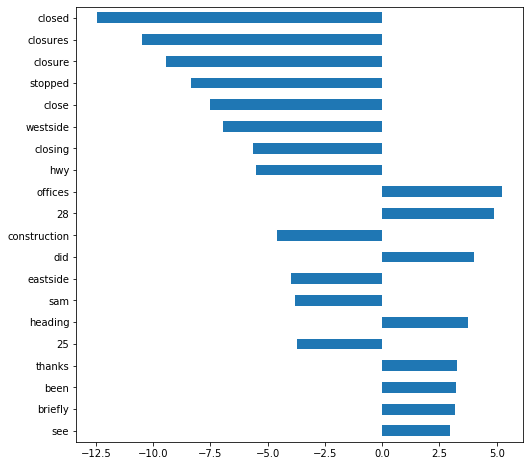

In [196]:
# setting a logistic regression variable as grid search does not hav a coef object
logreg_coef = gs_logreg.best_estimator_.named_steps.logreg.coef_

fig , ax = plt.subplots(figsize=(8,8))

coef_df = pd.DataFrame(logreg_coef, columns=cvec.get_feature_names()).T
coef_df['ABS'] = coef_df[0].abs()
coef_df.sort_values('ABS').tail(20).loc[:,0].plot.barh(ax=ax);